In [1]:
import os
import fnmatch
from tqdm import tqdm

import numpy as np
from numpy.typing import NDArray

import matplotlib.pyplot as plt

In [2]:
import classify as kNN_classify

In [3]:
for dirpath, dirnames, filenames in os.walk(os.getcwd()):
    for filename in fnmatch.filter(filenames, '*:Zone.Identifier'):
        file_path = os.path.join(dirpath, filename)
        try:
            os.remove(file_path)
        except Exception:
            pass

# Prepare - Transfer image textfile to vector data

In [4]:
def img2vector(filename):
    img_vector = np.zeros((1, 1024))
    with open(filename, 'r') as fr:
        for i in range(32):
            line_str = fr.readline()
            for j in range(32):
                img_vector[0, 32*i + j] = int(line_str[j])
    return img_vector

In [5]:
def plot_vector(img_vector:NDArray[1024]):
    img_matrix = img_vector.reshape(32, 32)
    plt.imshow(img_matrix, cmap='gray_r', interpolation='none')
    plt.colorbar()
    plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. ... 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. ... 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. ... 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. ... 1. 1. 0. 0. 0. 0. 0. 

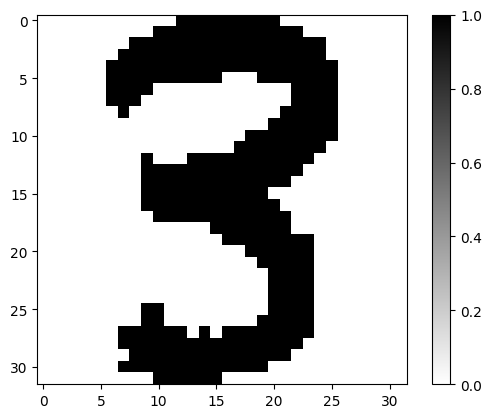

In [6]:
np.set_printoptions(edgeitems=10)   # show more elements
print(img2vector('testDigits/3_12.txt').reshape(32, 32))
np.set_printoptions(edgeitems=3)    # restore to default value

plot_vector(img2vector('testDigits/3_12.txt'))

# Unit Test

In [7]:
hw_features = []

training_file_list = os.listdir('trainingDigits')
training_sample_num = len(training_file_list)
training_matrix = np.zeros((training_sample_num, 1024))

for train_file_no in range(training_sample_num):
    train_file_name = training_file_list[train_file_no]
    train_file_feature = int(train_file_name.split('_')[0])

    hw_features.append(train_file_feature)

    training_matrix[train_file_no,:] = img2vector(
        f'trainingDigits/{train_file_name}'
    )

In [8]:
error_count = np.float64(0)
test_file_list = os.listdir('testDigits')
test_sample_num = len(test_file_list)

progress_bar = tqdm(total=test_sample_num)
for test_file_no in range(test_sample_num):
    test_file_name = test_file_list[test_file_no]
    test_file_feature = int(test_file_name.split('_')[0])

    test_file_data_vector = img2vector(
        f'testDigits/{test_file_name}'
    )

    classifier_result = kNN_classify.classify(
        test_file_data_vector[0], training_matrix, hw_features, 8
    )

    if classifier_result != test_file_feature:
        error_count += 1.0
    
    progress_bar.set_postfix(error=error_count, total=test_sample_num)
    progress_bar.update(1)

error_rate = np.divide(error_count, np.float64(test_sample_num))
acc = np.subtract(np.float64(1), error_rate)

print(f'acc = {100*acc:.2f}%')

100%|██████████| 946/946 [06:55<00:00,  2.33it/s, error=19, total=946]

acc = 97.99%


# Identify an image

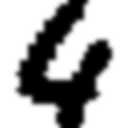

In [9]:
from PIL import Image

with Image.open('imageDigits/4_6.png') as img:
    img.show()

In [10]:
def png2mat(filepath):
    with Image.open(filepath).convert('L') as pngfile:
        gray_matrix = np.array(pngfile.resize((32, 32)))
    binary_matrix = np.where(gray_matrix < 96, 1., 0.)
    return binary_matrix

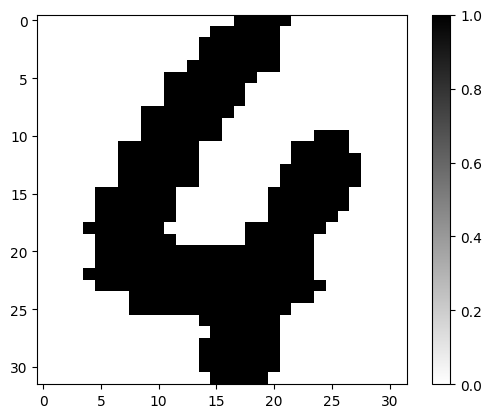

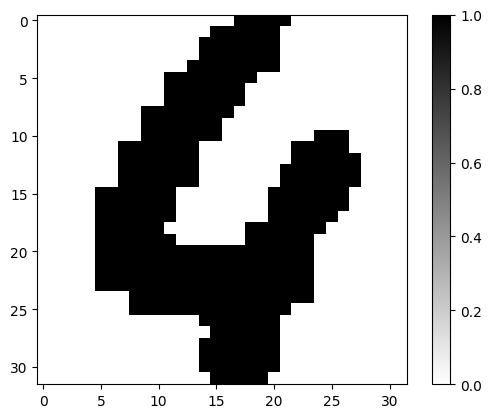

In [11]:
plot_vector(img2vector('testDigits/4_6.txt'))
plot_vector(png2mat('imageDigits/4_6.png'))

In [12]:
print(png2mat('imageDigits/4_6.png'))
print(img2vector('testDigits/4_6.txt').reshape(32, 32))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
image_list = os.listdir('imageDigits')
image_num = len(image_list)

for image_no in range(image_num):
    image_name = image_list[image_no]
    image_vector = png2mat(
        f'imageDigits/{image_name}'
    )

    classifier_result = kNN_classify.classify(
        image_vector.flatten(), training_matrix, hw_features, 8
    )

    print(
        f'{image_no+1:>3}/{image_num:>3}:' + ' '
        f'file {image_name} was be identified as {classifier_result}'
    )

  1/ 90: file 5_5.png was be identified as 5
  2/ 90: file 5_9.png was be identified as 5
  3/ 90: file 3_4.png was be identified as 3
  4/ 90: file 7_1.png was be identified as 7
  5/ 90: file 9_9.png was be identified as 9
  6/ 90: file 6_5.png was be identified as 6
  7/ 90: file 1_6.png was be identified as 1
  8/ 90: file 9_7.png was be identified as 9
  9/ 90: file 8_9.png was be identified as 8
 10/ 90: file 5_6.png was be identified as 5
 11/ 90: file 7_8.png was be identified as 7
 12/ 90: file 7_4.png was be identified as 7
 13/ 90: file 4_5.png was be identified as 4
 14/ 90: file 9_2.png was be identified as 9
 15/ 90: file 6_8.png was be identified as 6
 16/ 90: file 4_4.png was be identified as 4
 17/ 90: file 5_1.png was be identified as 5
 18/ 90: file 1_7.png was be identified as 1
 19/ 90: file 3_7.png was be identified as 3
 20/ 90: file 1_2.png was be identified as 1
 21/ 90: file 0_7.png was be identified as 0
 22/ 90: file 5_3.png was be identified as 5
 23/ 90: f